Thinkful Bootcamp Course

Author: Ian Heaton

Email: iheaton@gmail.com

Mentor: Nemanja Radojkovic

Date: 2017/04/17

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
%matplotlib inline

sb.set_style('darkgrid')
my_dpi = 96

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Exercise in Accuracy

## Decision Tree Vs Random Forest

### Question:
Which model can produce a more accurate model when classifying wine quality based on physicochemical features? 

### Data:

Dataset includes two groups of wines from Portugal one white and the other red.  Data can be found at the  UC Irvine Machine Learning Repository [2].

### Context:


#### For red and white variants of the Portuguese "Vinho Verde" wine

Vinho Verde is not a grape variety, it is a DOC for the production of wine. The name literally means "green wine," but translates as "young wine". It may be red, white, rosé and are usually consumed soon after bottling. Although a Vinho Verde can also be a sparkling, a Late Harvest or even Brandy. In its early years of production, the slight effervesce of the wine came from malolactic fermentation taking place in the bottle. In winemaking this is usually considered a wine fault but Vinho Verde producers found that consumers liked the slightly fizzy nature. However, the wines had to be packaged in opaque bottles in order to hide the unseemly turbidity and sediment that the "in-bottle MLF" produced. Today, most Vinho Verde producers no longer follow this practice with the slight sparkle being added by artificial carbonation.

The region is characterized by its many small growers, which numbered around 19,000 as of 2014. Many of these growers used to train their vines high off the ground, up trees, fences, and even telephone poles so that they could cultivate vegetable crops below the vines that their families may use as a food source [1].


### Content:

+ Fixed acidity:     Most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

+ Volatile Acidity:  The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

+ Citric Acid:       Found in small quantities, citric acid can add 'freshness' and flavor to wines.

+ Residual Sugar :   The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

+ Chlorides :        The amount of salt in the wine.

+ Free Sulfur Dioxide : The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

+ Total Sulfur Dioxide : Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

+ Density :          The density of wine is close to that of water depending on the percent alcohol and sugar content.

+ pH :              Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

+ Sulphates :      Wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

+ Alcohol :        The percent alcohol content of the wine.


In [21]:
# Read wine data from file and discard type feature
data_file = '/media/ianh/space/ThinkfulData/Wine/combination_white_red.csv'
wine = pd.read_csv(data_file)
del wine['type']
wine.head()
print("\nObservations : %d\n" % (wine.shape[0]))


Observations : 6497



## Preprocessing and exploratory data analysis 

In [3]:
# Check for missing data
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
exclude = ['quality']
y = wine.quality
X = wine.ix[:, wine.columns.difference(exclude)]

### Benchmarking Utility for timing model construction

In [63]:
# Timing context manager for statement invocations.
# Taken from Python Cookbook section 14.13
import time

from contextlib import contextmanager
@contextmanager
def timeblock(label):
    start = time.perf_counter()
    try:
        yield
    finally:
        end = time.perf_counter()
        print('{} : {:.4f}'.format(label, end - start))


## Decision  Tree

Time Spent Constructing Descion Tree : 0.0086

Accuracy on training set: 0.612

Accuracy on test set: 0.535
{3, 4, 5, 6, 7, 8}
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.732354 to fit



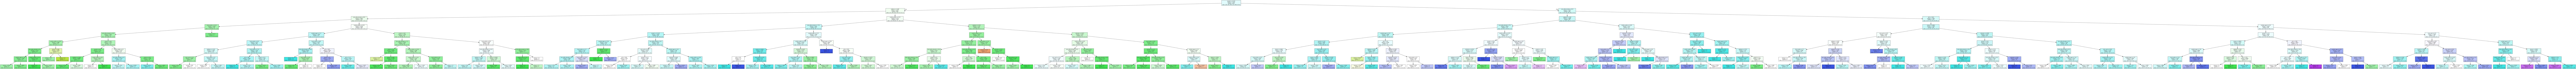

In [95]:
# Initialize and train our tree
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=8,
    min_samples_leaf=3,
    random_state = 1337
)

with timeblock('Time Spent Constructing Descion Tree'):
    decision_tree.fit(X_train, y_train)
    y_1_predictions = decision_tree.predict(X_test)


print("\nAccuracy on training set: {:.3f}".format(decision_tree.score(X_train, y_train)))
print("\nAccuracy on test set: {:.3f}".format(decision_tree.score(X_test, y_test)))

# How many unique classes are represented ?
print(set(y_1_predictions))

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

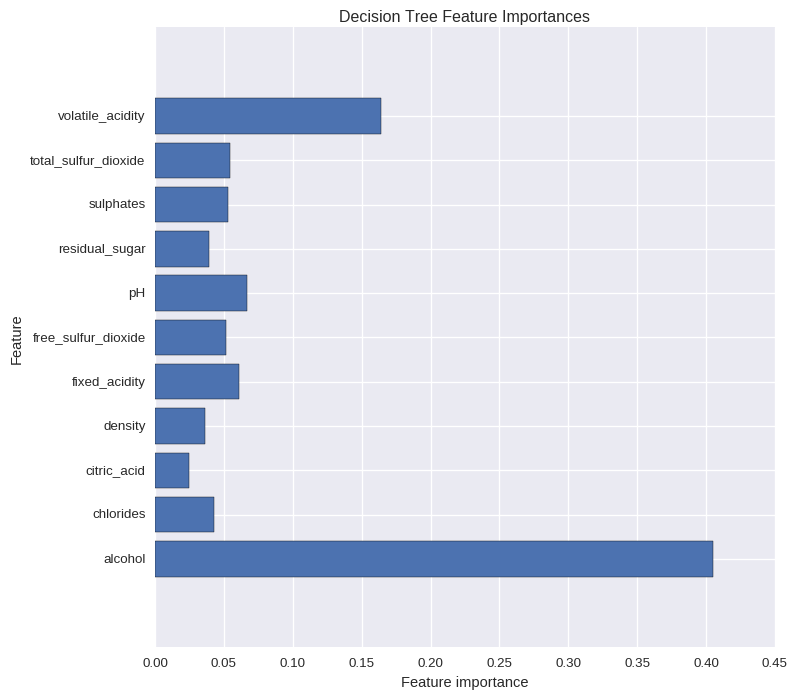

In [72]:
def plot_feature_importances(model, data, title):
    n_features = data.shape[1]
    plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title(title)

plot_feature_importances(decision_tree, X, "Decision Tree Feature Importances")

## Random Forest

Time Spent Constructing Random Forest : 0.1809

Accuracy on training set: 0.766

Accuracy on test set: 0.609
{8, 4, 5, 6, 7}


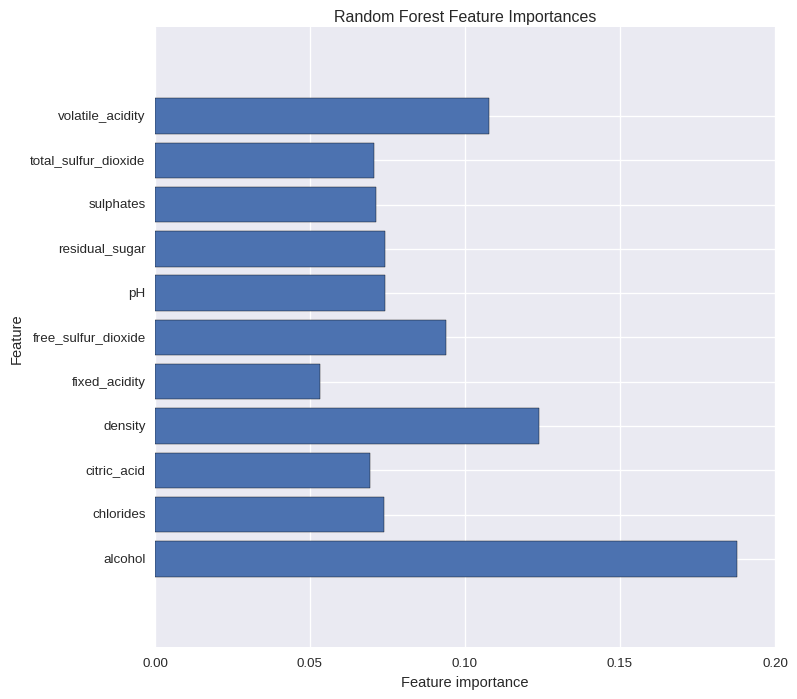

In [101]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier(
    n_estimators=15,
    criterion='entropy',
    max_features=3,
    max_depth=9
)

with timeblock('Time Spent Constructing Random Forest'):
    rfc.fit(X_train, y_train)
    y_1_predictions = rfc.predict(X_test)


print("\nAccuracy on training set: {:.3f}".format(rfc.score(X_train, y_train)))
print("\nAccuracy on test set: {:.3f}".format(rfc.score(X_test, y_test)))

# How many unique classes are represented ?
print(set(y_1_predictions))

plot_feature_importances(rfc, X, "Random Forest Feature Importances")

## Conclusions

The Random Forest model performed marginally better then the lone Decision tree.  Both were tasked with Multi-output Classification of wine quality.  The set of class outcomes varied from 1 (extremely bad) to 10 (extremely good). It took 8.6 ms to fit and predict training and testing data with the Decision tree.  With the Random Forest model the same data was fitted and a prediction carried out in 180 ms. The Random Forest with 15 trees took 18 times as long to compute. Both models accuracy was pretty poor.  

## References

1. https://en.wikipedia.org/wiki/Vinho_Verde
2. https://archive.ics.uci.edu/ml/datasets/Wine+Quality